In [355]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [356]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
flower_df = pd.read_csv(url, names=names)
flower_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
57,4.9,2.4,3.3,1.0,Iris-versicolor
77,6.7,3.0,5.0,1.7,Iris-versicolor
137,6.4,3.1,5.5,1.8,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor
17,5.1,3.5,1.4,0.3,Iris-setosa
91,6.1,3.0,4.6,1.4,Iris-versicolor
138,6.0,3.0,4.8,1.8,Iris-virginica
9,4.9,3.1,1.5,0.1,Iris-setosa
125,7.2,3.2,6.0,1.8,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [357]:
shape = flower_df.shape
dtypes = flower_df.dtypes
print ("\033[94m\033[1m\033[4mData Types:\x1b[0m")
print(dtypes)
print ("\033[94m\033[1m\033[4mShape of the data:\x1b[0m")
print(list(shape))
print ("\033[94m\033[1m\033[4mData description:\x1b[0m")
flower_df.describe()

Data Types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object
Shape of the data:
[150, 5]
Data description:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [358]:
null_data = flower_df[flower_df.isnull().any(axis=1)]
print ("\033[94m\033[1m\033[4mNull data rows:\x1b[0m")
print(null_data)

Null data rows:
Empty DataFrame
Columns: [sepal_length, sepal_width, petal_length, petal_width, class]
Index: []


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [359]:
flower_df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [360]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
flower_df['class'] = lb_make.fit_transform(flower_df['class'])
flower_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
46,5.1,3.8,1.6,0.2,0
42,4.4,3.2,1.3,0.2,0
64,5.6,2.9,3.6,1.3,1
55,5.7,2.8,4.5,1.3,1
61,5.9,3.0,4.2,1.5,1
130,7.4,2.8,6.1,1.9,2
94,5.6,2.7,4.2,1.3,1
102,7.1,3.0,5.9,2.1,2
35,5.0,3.2,1.2,0.2,0
123,6.3,2.7,4.9,1.8,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [361]:
corr = flower_df.corr()
corr_test = corr.loc[(corr['class']>=-0.1) & (corr['class']<= 0.1)]
corrtested_df = flower_df.drop(corr_test.index,axis=1 )

In [362]:
corrtested_df.sample()

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,0


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [363]:
vartested_df = corrtested_df.loc[:, corrtested_df.var() >= 0.1]
vartested_df.sample()

,sepal_length,sepal_width,petal_length,petal_width,class
119,6.0,2.2,5.0,1.5,2


## Question 6

*Plot the scatter matrix for all the variables.*

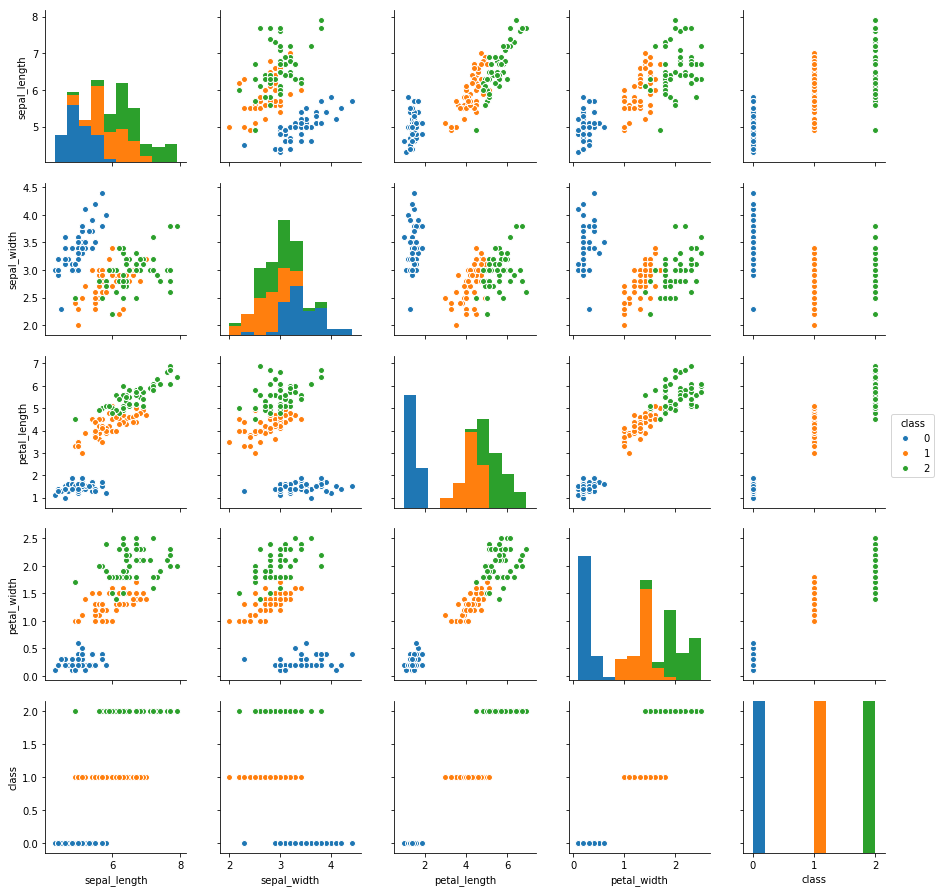

In [364]:
import seaborn as sns
%matplotlib inline
sns.pairplot(vartested_df , hue = "class")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [365]:
from sklearn.model_selection import train_test_split
ar = vartested_df.values
X = ar[:,0:4] 
y = ar[:,4] 
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [366]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for k in 3,5,9:
    
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    
    print ("\033[94m\033[1m\033[4mAccuracy Score:   When k=\x1b[0m", k)
    print(metrics.accuracy_score(y_test, predicted_labels))
    print ("\033[94m\033[1m\033[4mConfusion Matrix: When k=\x1b[0m", k)
    print(metrics.confusion_matrix(y_test, predicted_labels))
    print ("-"*30)

Accuracy Score:   When k= 3
1.0
Confusion Matrix: When k= 3
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
------------------------------
Accuracy Score:   When k= 5
1.0
Confusion Matrix: When k= 5
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
------------------------------
Accuracy Score:   When k= 9
0.9666666666666667
Confusion Matrix: When k= 9
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
------------------------------


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [367]:
K_MSE = []
for k in range(1,20, 2):
    NNH = KNeighborsClassifier(n_neighbors= k , weights = 'distance' )
    NNH.fit(X_train, y_train)
    predicted_labels = NNH.predict(X_test)
    MSE = 1- metrics.accuracy_score(y_test, predicted_labels)
    K_MSE.append([k,MSE])
K_MSE_df= pd.DataFrame({'k': [i[0] for i in K_MSE],'MSE': [i[1] for i in K_MSE] })
K_MSE_df

,MSE,k
0,0.000000,1
1,0.000000,3
2,0.000000,5
3,0.033333,7
4,0.033333,9
5,0.033333,11
6,0.033333,13
7,0.033333,15
8,0.033333,17
9,0.033333,19


In [368]:
opt_k = K_MSE_df['k'].loc[ (K_MSE_df['MSE']) == (min(K_MSE_df['MSE']))]
print("\033[94m\033[1m\033[4mOptimal number of neighbours are : k = \x1b[0m")
print (list(opt_k))

Optimal number of neighbours are : k = 
[1, 3, 5]


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

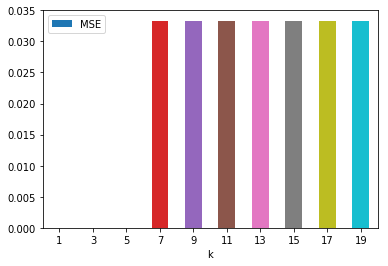

In [369]:
from matplotlib import pyplot as plt 
ax = K_MSE_df.plot.bar(x='k', y='MSE', rot=0)

# Naive Bayes with Iris Data

In [370]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [371]:
array = flower_df.values
X = array[:,0:4] 
y = array[:,4] 

In [372]:
#Check the dataset
print(y)
print(X)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

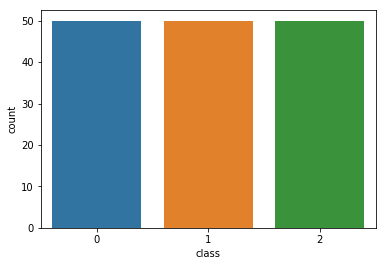

In [373]:
sns.countplot(x='class', data = flower_df)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

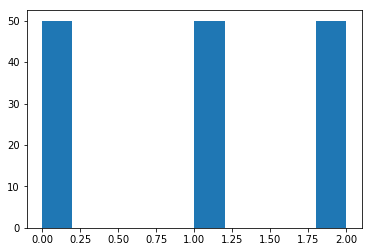

In [374]:
plt.hist(y)

In [375]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [376]:
corr = flower_df.corr()
corr
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [377]:
X =np.delete(X, 2, 1)
print("Corr b/w petal_width and petal_length is more than 0.95. So, droped the petal_length from X")
print ("-"*94)
print(X)

Corr b/w petal_width and petal_length is more than 0.95. So, droped the petal_length from X
----------------------------------------------------------------------------------------------
[[5.1 3.5 0.2]
 [4.9 3.  0.2]
 [4.7 3.2 0.2]
 [4.6 3.1 0.2]
 [5.  3.6 0.2]
 [5.4 3.9 0.4]
 [4.6 3.4 0.3]
 [5.  3.4 0.2]
 [4.4 2.9 0.2]
 [4.9 3.1 0.1]
 [5.4 3.7 0.2]
 [4.8 3.4 0.2]
 [4.8 3.  0.1]
 [4.3 3.  0.1]
 [5.8 4.  0.2]
 [5.7 4.4 0.4]
 [5.4 3.9 0.4]
 [5.1 3.5 0.3]
 [5.7 3.8 0.3]
 [5.1 3.8 0.3]
 [5.4 3.4 0.2]
 [5.1 3.7 0.4]
 [4.6 3.6 0.2]
 [5.1 3.3 0.5]
 [4.8 3.4 0.2]
 [5.  3.  0.2]
 [5.  3.4 0.4]
 [5.2 3.5 0.2]
 [5.2 3.4 0.2]
 [4.7 3.2 0.2]
 [4.8 3.1 0.2]
 [5.4 3.4 0.4]
 [5.2 4.1 0.1]
 [5.5 4.2 0.2]
 [4.9 3.1 0.1]
 [5.  3.2 0.2]
 [5.5 3.5 0.2]
 [4.9 3.1 0.1]
 [4.4 3.  0.2]
 [5.1 3.4 0.2]
 [5.  3.5 0.3]
 [4.5 2.3 0.3]
 [4.4 3.2 0.2]
 [5.  3.5 0.6]
 [5.1 3.8 0.4]
 [4.8 3.  0.3]
 [5.1 3.8 0.2]
 [4.6 3.2 0.2]
 [5.3 3.7 0.2]
 [5.  3.3 0.2]
 [7.  3.2 1.4]
 [6.4 3.2 1.5]
 [6.9 3.1 1.5]
 [5.5 2.3 1.3]
 [6

### Split data in Training and test set in 80:20.

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.20, random_state=1)

### Question 13 
Do Feature Scaling 

In [379]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [380]:
print ("\033[94m\033[1m\033[4mStandardScaler Mean\x1b[0m")
print(scaler.mean_)

StandardScaler Mean
[5.84333333 3.054      1.19866667]


In [381]:
print(scaler.transform(X))

[[-9.00681170e-01  1.03205722e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.31297673e+00]
 [-1.73673948e-01  3.11468391e+00 -1.05003079e+00]
 [-5.37177559e-01  1.95766909e+00 -1.05003079e+00]
 [-9.00681170e-01  1.03205722e+00 -1.18150376e+00]
 [-1.73673948e-01  1.72626612e+00 -1.18150376e+00]
 [-9.00681170e-01  1.72626612e+

### Question 14 
Train and Fit NaiveBayes Model

In [382]:
#Fit the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None)

In [383]:
#Predict
# make predictions
expected = y_test
predicted = model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [384]:
print ("\033[94m\033[1m\033[4mConfusion Matrix\x1b[0m")
print(metrics.confusion_matrix(expected, predicted))

Confusion Matrix
[[11  0  0]
 [ 0 11  2]
 [ 0  0  6]]


In [385]:
print ("\033[94m\033[1m\033[4mAccuracy Score:\x1b[0m")
print(metrics.accuracy_score(y_test, predicted))

Accuracy Score:
0.9333333333333333


In [386]:
print ("\033[94m\033[1m\033[4mPrecision and Recall metrics:\x1b[0m")
print(metrics.classification_report(expected, predicted))

Precision and Recall metrics:
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        11
        1.0       1.00      0.85      0.92        13
        2.0       0.75      1.00      0.86         6

avg / total       0.95      0.93      0.94        30



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [387]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [388]:
pima_df = pd.read_csv("diabetes.csv")
pima_df.shape

(768, 9)

In [389]:
pima_df.groupby(['Outcome']).count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [390]:
pima_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [391]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


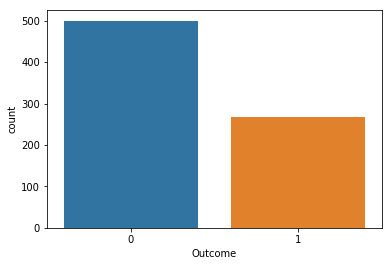

In [392]:
sns.countplot(x='Outcome', data = pima_df)

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


In [393]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [394]:
median_df = pima_df.iloc[:,1:8].replace(0, pima_df.iloc[:,1:8].median())
pima_df.iloc[:,1:8] = median_df

In [395]:
print ("\033[94m\033[1m\033[4mCorrelation Table:\x1b[0m")
pima_df.corr()

Correlation Table:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


Correlation Heatmap:


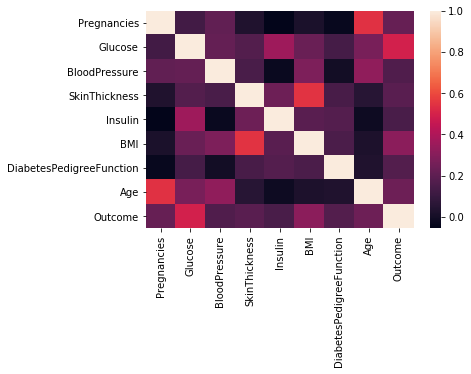

In [396]:
print ("\033[94m\033[1m\033[4mCorrelation Heatmap:\x1b[0m")
sns.heatmap(pima_df.corr())

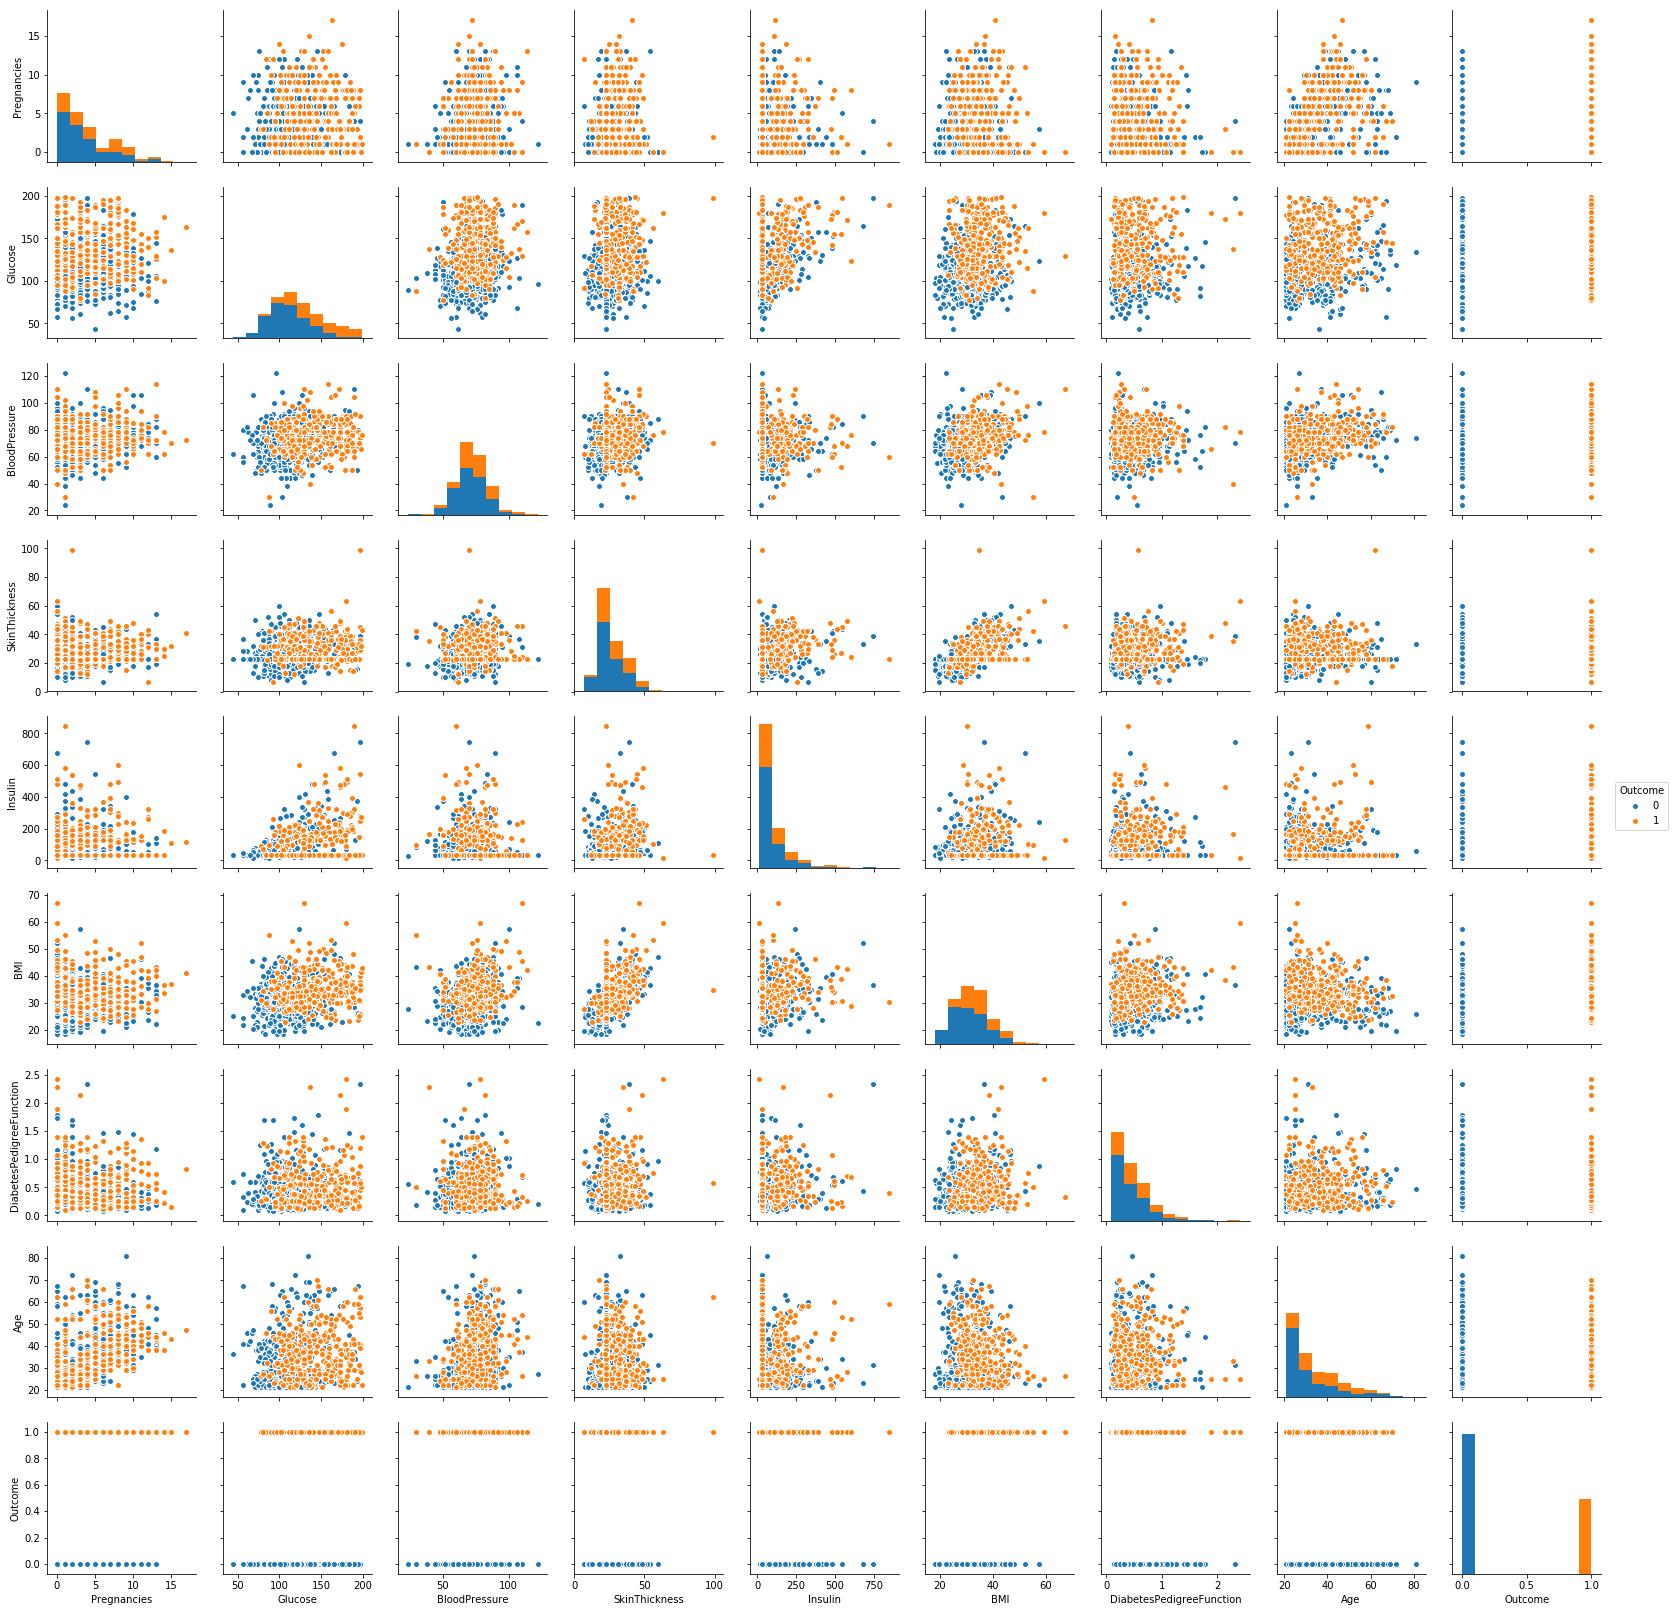

In [397]:
sns.pairplot(pima_df , hue = "Outcome")

# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

In [486]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
ar = pima_df.values
X = ar[:,0:8] 
y = ar[:,8] 
sss = StratifiedShuffleSplit(5,  0.5, random_state=1)
sss.get_n_splits(X, y)

5

In [487]:
print(sss)

StratifiedShuffleSplit(n_splits=5, random_state=1, test_size=0.5,
            train_size=None)


In [488]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 53 257 471 217 157 633 181 400 650 457 538 300 658 148 115 159 340 420
 292 383 461 740 705 306  73 669 611 736  33 103 467 640 163 664 731 502
 165 302 141 756 496 460 117 358 511 648 579 186 208 162 415 313 191 718
 586 422 490 482 491  47 559 158 697 264 641 653  30 639 623 606 477 590
 441 728 532 726 127  95 544 600 155 364  35 402 474 562 405 719 114 199
 745 133 530 424  18 536 508 219 246 613 418  14 608 262 169 767 355  38
 369 632 651 730 619 723 220 146 202 339 334 503  41  71 763 108 533 362
 376 134 707 203 509 591 666 338 395  19 390 443 469 483  69 655 578 539
 403  37 555 440 131 166 720 225 394 527 570  94 142 271 221 505  32 347
  93 109  36 128 140 571 618 752 581 260 416 442 175   0 289 216 192 337
 312 470 234 531 365 373 733 326 423 322 574 123 437 381 298 164 516 695
 346 665 446 200 330 187 644 580 677 172 588 672 444 518 277 573 359 686
 464 239 278 468 253  11  99 495 307 336 263 682 275  10 595 517 545 341
 230 706 596  68 435 419 689 120 171 196 451

In [489]:
# ar = pima_df.values
# X = ar[:,0:8] 
# y = ar[:,8] 

# X_train, X_test, y_train, y_test = train_test_split(X,y,  test_size=0.50, random_state=1)

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [490]:
# use from sklearn.svm import SVC

In [491]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [492]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [493]:
expected = y_test
predicted = clf.predict(X_test)

In [494]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.65      1.00      0.79       250
        1.0       0.00      0.00      0.00       134

avg / total       0.42      0.65      0.51       384



In [495]:
print(metrics.confusion_matrix(expected, predicted))

[[250   0]
 [134   0]]


## ***precision and  recall scores are not good without  Feature scaling 

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

In [496]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [497]:
clf = SVC(gamma='auto')
clf.fit(X_train_scaled, y_train)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=None, shrinking=True,
tol=0.001, verbose=False)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [498]:
expected = y_test
predicted = clf.predict(X_test_scaled)

In [499]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.74      0.93      0.83       250
        1.0       0.76      0.40      0.52       134

avg / total       0.75      0.74      0.72       384



In [500]:
print(metrics.confusion_matrix(expected, predicted))

[[233  17]
 [ 81  53]]


## ***precision and    recall scores are better with  (MinMax)Feature scaling

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

In [538]:
range_list = list(range(100,900, 10))
C = []
for x in range_list:
    C.append(x/1000)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [540]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [503]:
#  param_grid = [    {        
#      'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
#      'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [541]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': C   } ]

In [542]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [543]:
gs.fit(X_train_scaled, y_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.4...73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [544]:
gs.best_estimator_

SVC(C=0.31, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [545]:
gs.best_score_ 

0.765625

In [546]:
expected = y_test
predicted = gs.predict(X_test_scaled)

In [547]:
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.75      0.91      0.82       250
        1.0       0.72      0.43      0.54       134

avg / total       0.74      0.74      0.73       384



In [548]:
print(metrics.confusion_matrix(expected, predicted))

[[228  22]
 [ 76  58]]
